In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
Nside = 64
ellmax=3*Nside-1
Npix = hp.nside2npix(Nside)
theta, phi = hp.pix2ang(Nside, np.arange(Npix))
maptheta = np.zeros(Npix)
for i in range(4):
    maptheta += np.abs(phi-i*np.pi/2-np.pi/4)<10*np.pi/180
mapphi = np.zeros(Npix)

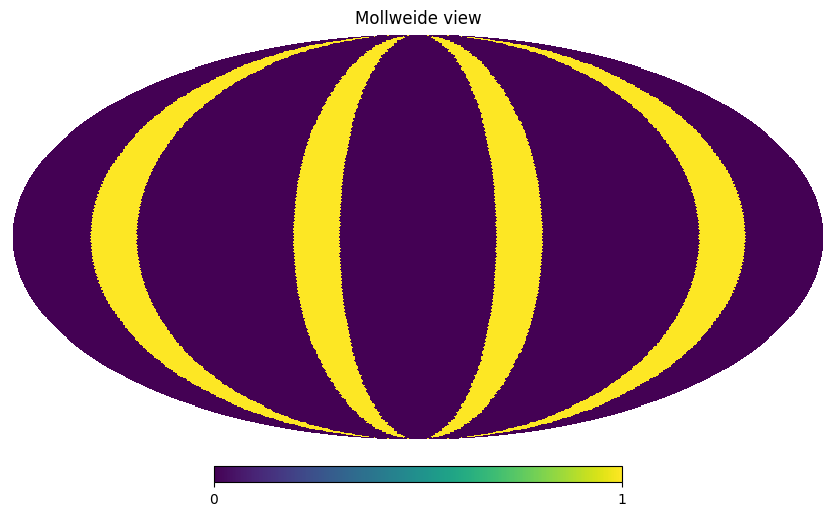

In [3]:
hp.mollview(maptheta)

In [4]:
map_spin0 = hp.map2alm(maptheta, ellmax)
map_spin1 = hp.map2alm_spin([maptheta, mapphi], 1, ellmax)
map_spin2 = hp.map2alm_spin([maptheta, mapphi], 2, ellmax)

In [5]:
R= hp.rotator.Rotator ([0,90,45])
gap_spin0 = R.rotate_alm(map_spin0)
gap_spin1 = [R.rotate_alm(map) for map in map_spin1]
gap_spin2 = [R.rotate_alm(map) for map in map_spin2]
smap_spin0 = hp.alm2map(gap_spin0, Nside,ellmax)
smap_spin1 = hp.alm2map_spin(gap_spin1, Nside,1, ellmax)
smap_spin2 = hp.alm2map_spin(gap_spin2, Nside,2, ellmax)

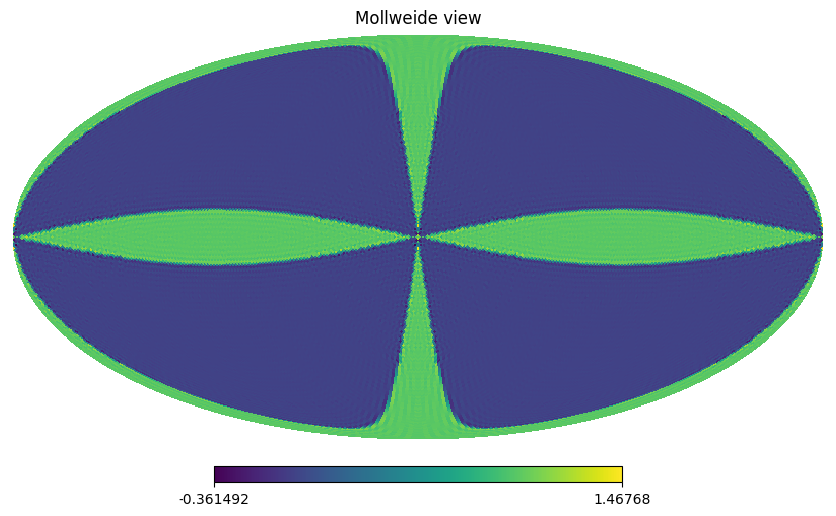

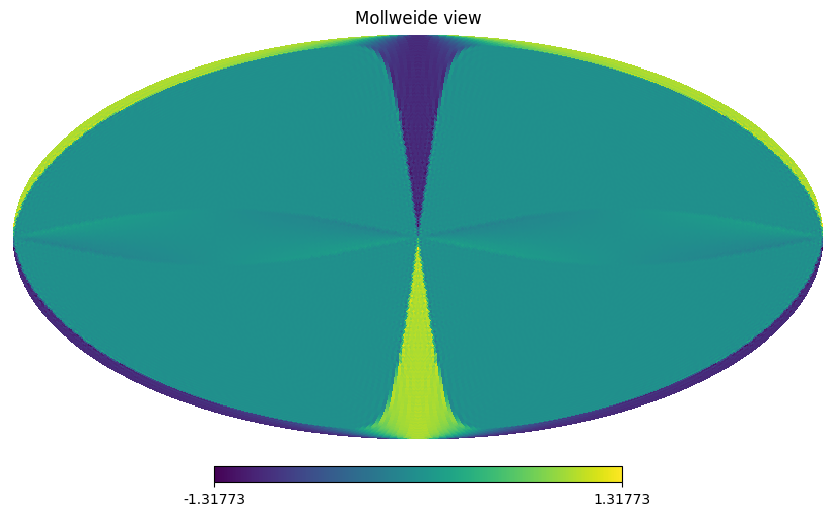

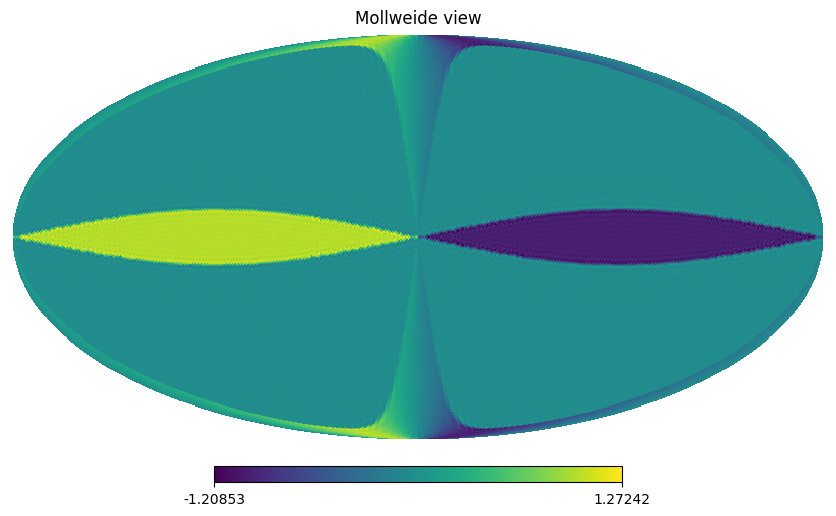

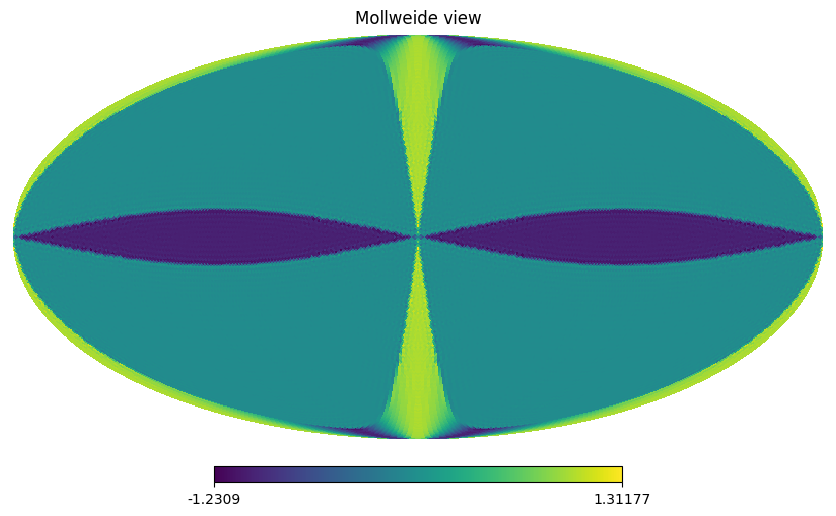

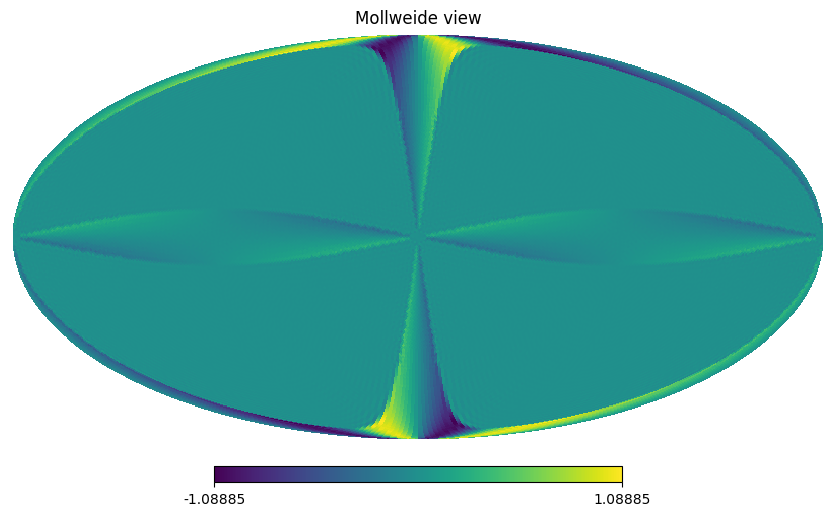

In [6]:
for mp in (smap_spin0,smap_spin1[0],smap_spin1[1],smap_spin2[0],smap_spin2[1]):
    hp.mollview(mp)